In [1]:
%matplotlib inline

### Library Imports

In [2]:
import tensorflow as tf

# Enable GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2023-03-28 12:42:43.294104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 12:42:45.207339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 12:42:45.233954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-28 12:42:45.234717: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there m

In [3]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split


###  I. Data Loading

In [4]:
# read the CSV file
df_full = pd.read_csv('/mnt/data/MS39_Raw/CSO2/metadata/new_skanda_230320231356.csv', low_memory=False)

In [5]:
# Filter by unique Image ID 
df_byImageID= df_full.drop_duplicates(subset=['ImageID'])

### Checking the Data

In [6]:
df_byImageID.shape

(51238, 44)

### Dropping unnecessary predictors

In [7]:
# Drop unnecessary columns
df_byImageID.drop(["ImageDateTime", 
                   "QualityScoreFront", 
                   "VAunit", 
                   "VAvalue", 
                   "VAbaseValue", 
                   "QualityScoreBack", 
                   "Sex", 
                   "File",  
                   "VAmethod", 
                   "Comments", 
                   "TagID", 
                   "TasassignmentsID", 
                   "TagName", 
                   "FileType", 
                   "Stage", 
                   "TestID", 
                   "Surname", 
                   "FirstName",
                   "estimate_noise",
                   "estimate_signal2noise",
                   "estimate_contrast",
                   "estimate_uniformity",
                   "estimate_sharpness",
                   "avg_intensity",
                   "std_intensity",
                   "med_intensity",    
                   "DOB", 
                   "Date",
                   "ThinnestPointPachymetry", 
                   "Laterality",  
                   "TestDateTime", 
                   "UnknownID", 
                   "AcqCode", 
                   "PatientID", 
                   "ImageID" ], 
                   axis=1, inplace=True)

/tmp/ipykernel_22357/345366510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_byImageID.drop(["ImageDateTime",


In [8]:
df_byImageID.dropna()

,Patkey,Age,Front_K1,K2,Back_K1,Back_K2,KMax,FilePath,Resolution
0,2821948,27.0,45.7,51.3,-6.8,-8.0,64.4,/mnt/scratch/mehphoenix/Images/00009ae9-997d-4...,600x1800
12,2821948,27.0,43.7,46.2,-6.2,-7.3,49.6,/mnt/scratch/mehphoenix/Images/00009ae9-997d-4...,600x1800
24,2821948,27.0,43.7,46.2,-6.2,-7.3,49.6,/mnt/scratch/mehphoenix/Images/00009ae9-997d-4...,600x1800
36,2821948,27.0,43.7,46.2,-6.2,-7.3,49.6,/mnt/scratch/mehphoenix/Images/00009ae9-997d-4...,600x1800
48,2821948,27.0,45.7,51.3,-6.8,-8.0,64.4,/mnt/scratch/mehphoenix/Images/00009ae9-997d-4...,600x1800
...,...,...,...,...,...,...,...,...,...
762252,2675272,30.0,40.7,43.0,-5.5,-6.3,50.2,/mnt/scratch/mehphoenix/Images/ffffd9b0-9792-4...,600x1800
762264,2675272,30.0,41.8,42.4,-5.8,-5.9,43.7,/mnt/scratch/mehphoenix/Images/ffffd9b0-9792-4...,600x1800
762276,2675272,30.0,41.8,42.4,-5.8,-5.9,43.7,/mnt/scratch/mehphoenix/Images/ffffd9b0-9792-4...,600x1800
762288,2675272,30.0,41.8,42.4,-5.8,-5.9,43.7,/mnt/scratch/mehphoenix/Images/ffffd9b0-9792-4...,600x1800


In [9]:
# Filter the DataFrame based on the 'Resolution' column and select the first 1500 rows
df_byImageID = df_byImageID[df_byImageID['Resolution'].str.contains("1024x1800")].sample(2000, random_state=42)

In [10]:
df_byImageID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 712355 to 337470
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patkey      2000 non-null   int64  
 1   Age         2000 non-null   float64
 2   Front_K1    1940 non-null   float64
 3   K2          1940 non-null   float64
 4   Back_K1     1940 non-null   float64
 5   Back_K2     1940 non-null   float64
 6   KMax        1940 non-null   float64
 7   FilePath    2000 non-null   object 
 8   Resolution  2000 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 156.2+ KB


## Conv Net

In [11]:

from tensorflow import keras

In [12]:
print(tf.__version__, ' ', tf.keras.__version__)

2.11.0   2.11.0


### Loading the Images into the model

In [13]:
df = df_byImageID

In [25]:

def load_images(df):
    images = []
    for file_path in df['FilePath']:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale images
        img = cv2.resize(img, (450, 256))  # Resize the image (change dimensions as needed)
        img = np.stack((img,)*3, axis=-1)  # Stack the grayscale image to create a 3-channel image
        images.append(img)
    return np.array(images)

# Load images into memory
images = load_images(df_byImageID)

### Splitting the dataset and normalising the image data

In [20]:
X = images
y = df_byImageID['K2'].values

# Filter X and y simultaneously, removing rows with NaNs in y
X_filtered, y_filtered = zip(*[(x, target) for x, target in zip(X, y) if not np.isnan(target)])

# Convert the filtered X and y back to numpy arrays
X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create a mask for non-NaN values in train_labels
non_nan_mask = ~np.isnan(train_labels)

# Filter train_images and train_labels using the mask
train_images_filtered = train_images[non_nan_mask]
train_labels_filtered = train_labels[non_nan_mask]

# Check if there are any NaN values in train_labels_filtered
print("Are there NaN values in train_labels_filtered?", np.isnan(train_labels_filtered).any())

Front_K1      True
K2            True
Back_K1       True
Back_K2       True
KMax          True
FilePath      True
Resolution    True
dtype: bool


### Resnet50 Architecture

Total number of layers in the Resnet model: 175
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 15, 2048)       23587712  
                                                                 
 flatten_1 (Flatten)         (None, 245760)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               31457408  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55,053,441
Trainable params: 55,000,321
Non-trainable params: 53,120
_______________________________________________________

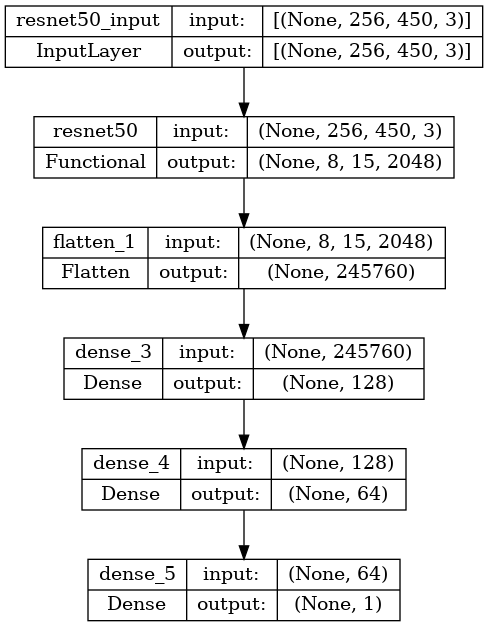

In [2]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.activations import relu
from keras.callbacks import EarlyStopping
from keras import mixed_precision
from keras.utils import plot_model
from keras.utils import plot_model

# 2. Set the mixed precision policy.
policy = mixed_precision.Policy('mixed_float16')  # Changed to 'mixed_float16' for mixed precision training
mixed_precision.set_global_policy(policy)

# ResNet
# Load ResNet50 model pre-trained on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 450, 3))

total_layers = len(resnet.layers)
print("Total number of layers in the Resnet model:", total_layers)

# Unfreeze the last few layers of the ResNet50 model
for layer in resnet.layers[:-40]:
    layer.trainable = False

for layer in resnet.layers[-40:]:
    layer.trainable = True

model = Sequential([
    resnet,
    Flatten(),
    Dense(128, activation=lambda x: relu(x, alpha=0.1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # Dropout(0.5),
    Dense(64, activation=lambda x: relu(x, alpha=0.1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # Dropout(0.5),
    Dense(1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))  # Regression output layer
])

model.summary()
plot_model(model, to_file='base_model.png', show_shapes=True)
print(plot.model)
Image.open('base_model.png')

# 6. Set the learning rate schedule and compile the model.
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=10000,
    decay_rate=0.96)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])  # Changed 'accuracy' to 'mae' for regression problems

# 7. Train the model.
early_stopping = EarlyStopping(monitor='val_loss', patience=40)

history = model.fit(train_images_filtered, train_labels_filtered, batch_size=128, shuffle=True, 
                    steps_per_epoch=len(train_images_filtered) // 128, epochs=500, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# 8. Evaluate the model.
loss, mae = model.evaluate(test_images, test_labels)  
print('Loss:', loss)
print('Mean Absolute Error:', mae)


### a. Inception V3 Architecture

In [1]:

import tensorflow as tf
from tensorflow import keras
from keras import mixed_precision
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense, LeakyReLU, Dropout
from keras.regularizers import l2
from keras.utils import plot_model

# 2. Set the mixed precision policy.
policy = mixed_precision.Policy('mixed_float16')  # Changed to 'mixed_float16' for mixed precision training
mixed_precision.set_global_policy(policy)

# 3. Load the InceptionV3 model pre-trained on ImageNet.
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 450, 3))

total_layers = len(inception.layers)
print("Total number of layers in the InceptionV3 model:", total_layers)

# 4. Unfreeze the last few layers of the InceptionV3 model.
for layer in inception.layers[:-40]:
    layer.trainable = False

for layer in inception.layers[-40:]:
    layer.trainable = True

# 5. Add new layers to the InceptionV3 model.
model = Sequential([
    inception,
    Flatten(),
    Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    Dense(1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='linear', dtype='float32')  # Added 'linear' activation and 'float32' dtype
])

model.summary()

plot_model(model, to_file='inceptionV3_model.png', show_shapes=True)

# 6. Set the learning rate schedule and compile the model.
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.96)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])  # Changed 'accuracy' to 'mae' for regression problems

# 7. Train the model.
early_stopping = EarlyStopping(monitor='val_loss', patience=40)

history = model.fit(train_images_filtered, train_labels_filtered, batch_size=128, shuffle=True, 
                    steps_per_epoch=len(train_images_filtered) // 128, epochs=500, validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# 8. Evaluate the model.
loss, mae = model.evaluate(test_images, test_labels)  
print('Loss:', loss)
print('Mean Absolute Error:', mae)

2023-03-29 21:54:56.743249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 3090, compute capability 8.6


2023-03-29 21:54:59.251779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 21:54:59.291231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 21:54:59.292102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 21:54:59.293056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 21:54:59.309303: I tensorflow/core/platform/cpu_feature_g

Total number of layers in the InceptionV3 model: 311
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 12, 2048)       21802784  
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 64)                9437248   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 le

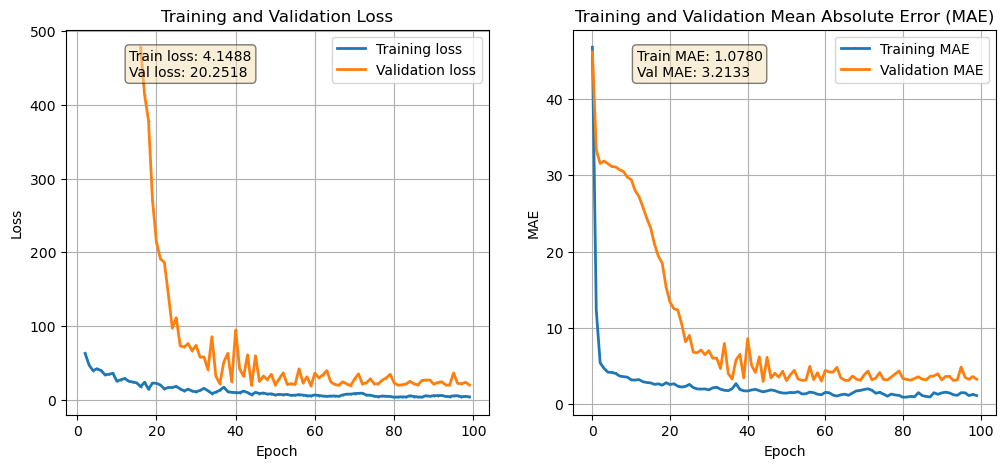

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.2)

# Plot training and validation loss
axs[0].plot(history.history['loss'], label='Training loss', linestyle='-', linewidth=2, marker='.', markersize=1)
axs[0].plot(history.history['val_loss'], label='Validation loss', linestyle='-', linewidth=2, marker='.', markersize=1)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')  
axs[0].legend()
axs[0].grid(True) 

# Display final loss values
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
# axs[0].text(0.5, 0.6, f'Train loss: {final_train_loss:.4f}\nVal loss: {final_val_loss:.4f}', transform=axs[0].transAxes)

# Add correlation coefficient and range of predicted values to the plot
plt.text(0.15, 0.95, f'Train loss: {final_train_loss:.4f}\nVal loss: {final_val_loss:.4f}', transform=axs[0].transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot training and validation MAE
axs[1].plot(history.history['mae'], label='Training MAE', linestyle='-', linewidth=2, marker=',', markersize=1)
axs[1].plot(history.history['val_mae'], label='Validation MAE', linestyle='-', linewidth=2, marker=',', markersize=1)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].set_title('Training and Validation Mean Absolute Error (MAE)')  # Add title
axs[1].legend()
axs[1].grid(True)  # Add gridlines

# Display final MAE values
final_train_mae = history.history['mae'][-1]
final_val_mae = history.history['val_mae'][-1]
# axs[1].text(0.5, 0.6, f'Train MAE: {final_train_mae:.4f}\nVal MAE: {final_val_mae:.4f}', transform=axs[1].transAxes)
plt.text(0.15, 0.95,  f'Train MAE: {final_train_mae:.4f}\nVal MAE: {final_val_mae:.4f}', transform=axs[1].transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


plt.show()


13/13 [==============================] - 1s 39ms/step


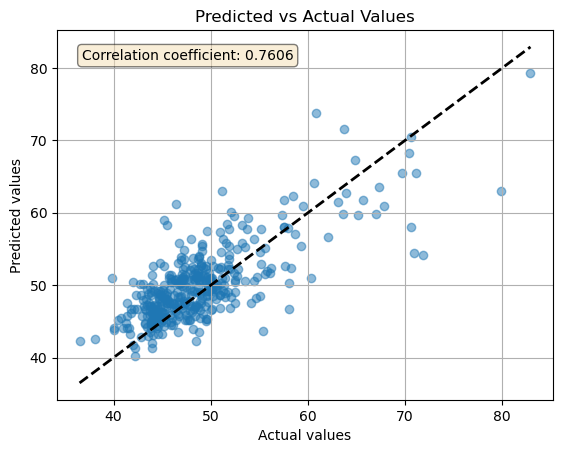

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(test_images)


def plot_predictions(test_labels, y_pred):
    # Plot the predicted vs actual values
    plt.scatter(test_labels, y_pred, alpha=0.5)  # Add transparency to better visualize overlapping points
    plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)  # Add a diagonal line
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Predicted vs Actual Values')  # Add a title to the plot
    plt.grid(True)  # Add a grid to the plot

    # Compute the correlation coefficient
    corr = np.corrcoef(test_labels, y_pred[:, 0])[0, 1]

    # Print the range of predicted values
    pred_range = f"Range of predicted values: {round(y_pred.min(), 2)} - {round(y_pred.max(), 2)}"  # Round the range values to 2 decimal places

    # Add correlation coefficient and range of predicted values to the plot
    plt.text(0.05, 0.95, f"Correlation coefficient: {round(corr, 4)}", transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.show()


# Call the function to plot predictions and display metrics
plot_predictions(test_labels, y_pred)
print(round(y_pred.min(), 2), round(y_pred.max(), 2))


In [ ]:
print(round(y_pred.min(), 2), round(y_pred.max(), 2))

40.25 79.25


Kernel crash checkpoints

In [ ]:
print("Hello")
import IPython
print(IPython.__version__)

Hello
8.10.0


if version is not showing, kernel is dead

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.11.0


In [ ]:
print("Hello Again")

Hello Again
